In [1]:
import os
os.chdir('..')

In [2]:
from deterministic.homogeneous import solve_homogeneous_system, compute_diagram, compute_2D_diagram, compute_2D_botnet, compute_botnet_threshold
from deterministic.plots import plot_evolution, plot_diagram, plot_2D_diagram, plot_3D_protected, plot_2D_botnet, plot_botnet_threshold

import numpy as np

# Complete model

Since both infections are completely independent, adding the black worm should not alter the diagram. In the following, we reproduce this last 2D diagram but setting $\beta_B\neq 0$.

In [15]:
parameters = {
    'beta': {'B': 0.5, 'W': 0},
    'epsilon': 0.1,
    'gamma': 1,
    'mu': 1
}

beta = np.linspace(0.01, 10, 100)
epsilon = np.linspace(0.01, 2, 100)
dt = 0.01

result = compute_2D_diagram(parameters, 1000, beta_W=beta, epsilon_p=epsilon, initial_W=0.0001, initial_B=0.0001, dt=dt)

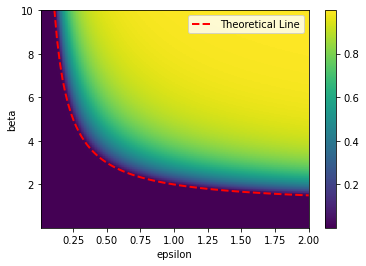

In [16]:
plot_2D_diagram(result)

We can also plot the diagram for $R_0$.

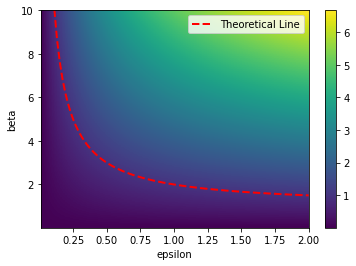

In [17]:
data = result.copy()
data[:, 2] = (data[:, 0]/parameters['mu'])*((data[:, 1]/parameters['gamma'])/(data[:,1]/parameters['gamma'] + 1))
plot_2D_diagram(data)

We can use these values to test what is the final fraction of the population in the $B$ state given that the final fraction of recovered people in the SEIR model is given by [Britton et al.](https://doi.org/10.1007/978-3-030-30900-8):

$$\rho_P = 1 - e^{-R_0 \rho_P} $$

We can compare the values from this equation to the numerical solutions of the model.

In [18]:
parameters = {
    'beta': {'B': 0.5, 'W': 0},
    'epsilon': 0.1,
    'gamma': 1,
    'mu': 1
}

beta = np.linspace(0.01, 10, 20)
epsilon = np.linspace(0.01, 2, 20)
dt = 0.01

result = compute_2D_diagram(parameters, 1000, beta_W=beta, epsilon_p=epsilon, initial_W=0.0001, initial_B=0.0001, dt=dt)

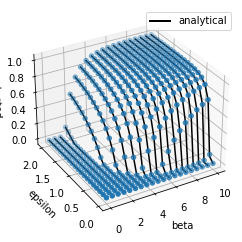

In [19]:
plot_3D_protected(result)

The last elements of the model are the maximum fraction of the population in the $B$ state and the time window in which said fraction is above a certain threshold.

Actually, we can estimate for which set of parameters the white worm will completely prevent the creation of a botnet. For the black worm, if we are near the disease-free state, we can approximate its evolution as [Ma](https://doi.org/10.1016%2Fj.idm.2019.12.009):

$$\dot{\rho}_B \approx \beta_B \rho_B$$

So that in the early phase of the outbreak the size of the botnet will grow as:

$$\rho_B(t) = \rho_B(0) e^{\beta t}$$

In other words, the size of the outbreak grows at rate $\beta_B$.

Similarly, for the white worm, in the early phase of the infection we have:

$$\dot{\rho}_D \approx \beta_W \rho_W - (\epsilon + \gamma) \rho_D$$
$$\dot{\rho}_W \approx \epsilon \rho_D - \mu \rho_W$$

So that the jacobian is:

$$J = \left[\begin{array}{cc} -(\epsilon + \gamma) & \beta_W \\ \epsilon & -\mu \end{array}\right] $$

And its eigenvalues, since it is a 2x2 matrix, can be easily obtained using its trace:

$$\lambda = \frac{tr(J) \pm \sqrt{(tr(J))^2 - 4\det(J)}}{2}$$

$$\Rightarrow \lambda = \frac{-(\epsilon + \gamma + \mu) \pm \sqrt{(-(\epsilon + \gamma + \mu))^2 - 4[(\epsilon + \gamma)\mu - \beta_W \epsilon]}}{2}$$

$$\lambda = \frac{-(\epsilon + \gamma + \mu) + \sqrt{(\epsilon+\gamma)^2 + \mu^2 + 2(\epsilon + \gamma)\mu - 4(\epsilon+\gamma)\mu + 4\beta_w\epsilon}}{2}$$

$$\lambda = \frac{-(\epsilon + \gamma + \mu) + \sqrt{(\epsilon+\gamma -\mu)^2 + 4\beta_w\epsilon}}{2}$$

So that the botnet can only grow if

$$2\beta_B \gt -(\epsilon + \gamma + \mu) + \sqrt{(\epsilon+\gamma -\mu)^2 + 4\beta_W\epsilon}$$

We can test this expression by studying the size of the botnet as a function of $\beta_B$ and $\beta_W$ for several values of $\epsilon$ and $\gamma$ (since we can set $\mu=1$ as previously discussed).

In [20]:
parameters = {
    'beta': {'B': 0.5, 'W': 0},
    'epsilon': 1,
    'gamma': 1,
    'mu': 1
}

beta_B = np.linspace(0.01, 10, 100)
beta_W = np.linspace(0.01, 10, 100)
dt = 0.01

result = compute_2D_botnet(parameters, 1000, beta_B, beta_W, initial_W=0.0001, initial_B=0.0001, dt=dt)

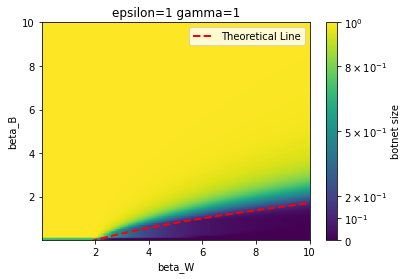

In [21]:
plot_2D_botnet(result)

In [22]:
parameters = {
    'beta': {'B': 0.5, 'W': 0},
    'epsilon': 0.5,
    'gamma': 1,
    'mu': 1
}

beta_B = np.linspace(0.01, 10, 100)
beta_W = np.linspace(0.01, 10, 100)
dt = 0.01

result = compute_2D_botnet(parameters, 1000, beta_B, beta_W, initial_W=0.0001, initial_B=0.0001, dt=dt)

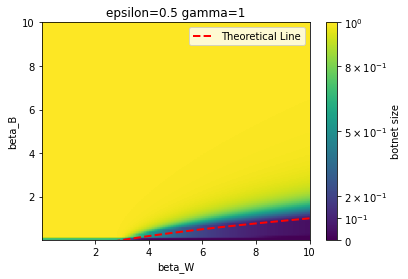

In [23]:
plot_2D_botnet(result, epsilon = 0.5)

In [24]:
parameters = {
    'beta': {'B': 0.5, 'W': 0},
    'epsilon': 2,
    'gamma': 1,
    'mu': 1
}

beta_B = np.linspace(0.01, 10, 100)
beta_W = np.linspace(0.01, 10, 100)
dt = 0.01

result = compute_2D_botnet(parameters, 1000, beta_B, beta_W, initial_W=0.0001, initial_B=0.0001, dt=dt)

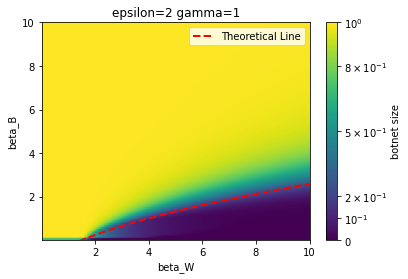

In [25]:
plot_2D_botnet(result, epsilon = 2)

In [26]:
parameters = {
    'beta': {'B': 0.5, 'W': 0},
    'epsilon': 2,
    'gamma': 0.1,
    'mu': 1
}

beta_B = np.linspace(0.01, 10, 100)
beta_W = np.linspace(0.01, 10, 100)
dt = 0.01

result = compute_2D_botnet(parameters, 1000, beta_B, beta_W, initial_W=0.0001, initial_B=0.0001, dt=dt)

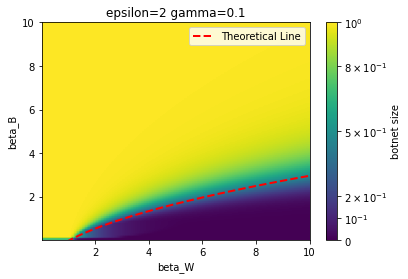

In [27]:
plot_2D_botnet(result, epsilon=2, gamma=0.1)

Given that the approximation works very well, we can focus on studying this threshold since it is the one that will ensure us that the botnet will not exist at any point. This way, we can easily explore its evolution for different values of $\epsilon$ and $\gamma$.

In the following, we explore the model with $\gamma = 1$.

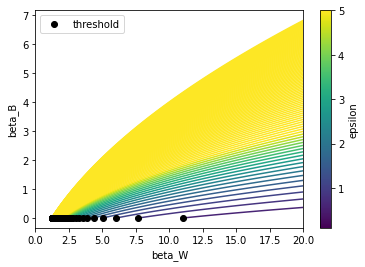

In [28]:
plot_botnet_threshold(20, np.linspace(0.1, 5, 100), gamma = 1, mu = 1)

As we can see, the smaller the value of $\epsilon$, the larger $\beta_W$ has to be to prevent the appearance of a botnet. In the limit in which $\epsilon \rightarrow \infty$ we should recover the SIR model in which the growth rate is simply $\beta_W - \mu$. Thus, the botnet may be prevented if $\beta_W > \beta_B + \mu = \beta_B + 1$.

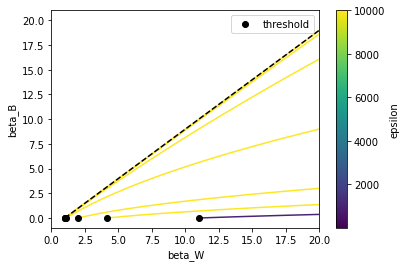

In [29]:
plot_botnet_threshold(20, np.array([10**x for x in [-1, -0.5, 0, 1, 2, 3, 4]]), gamma = 1, mu = 1, th=True)

We can now explore the role of $\gamma$ with fixed $\epsilon=1$:

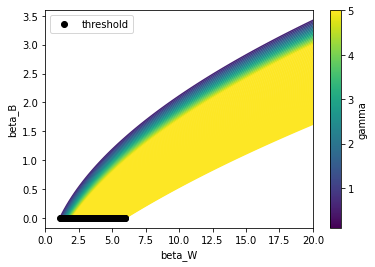

In [30]:
plot_botnet_threshold(20, epsilon=1, gamma=np.linspace(0.1, 5, 100), mu=1)

And, for instance, for $\epsilon=10$:

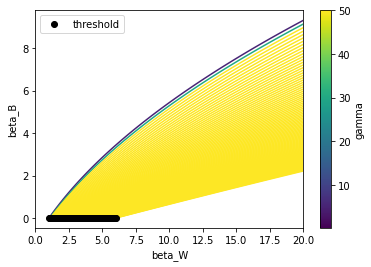

In [31]:
plot_botnet_threshold(20, epsilon=10, gamma=np.linspace(0.1, 50, 100), mu=1)

As expected, the larger the value of $\gamma$, the harder it is to prevent the aparition of a botnet. 

Lastly, we'll look at the amount of time a botnet is above a critical size, which means that it can be used to perform an attack. The theoretical W size represents the maximum spread of the white worm (1 - threshold). We can see that if it only spreads up to ~60% of the system, 40% of the system will essentially be infected for the whole simulation. If we look closer there is a range of values where it will fit for a while, but still if it doesn't cover the whole system, it is useless.

In [32]:
import os
os.chdir('..')

import numpy as np
from deterministic.homogeneous import compute_botnet_threshold
from deterministic.plots import plot_2D_botnet_time

In [33]:
parameters = {
    'beta': {'B': 1, 'W': 2},
    'epsilon': 1,
    'gamma': 1,
    'mu': 1
}
t, V, B, D, DB, W, WB, P = list(range(8))

force_rate_list = np.linspace(0.01, 10, 100)
threshold_list = np.linspace(0, 1.0, 100)

a = compute_botnet_threshold(parameters, 1000, force_rate_list, threshold_list)

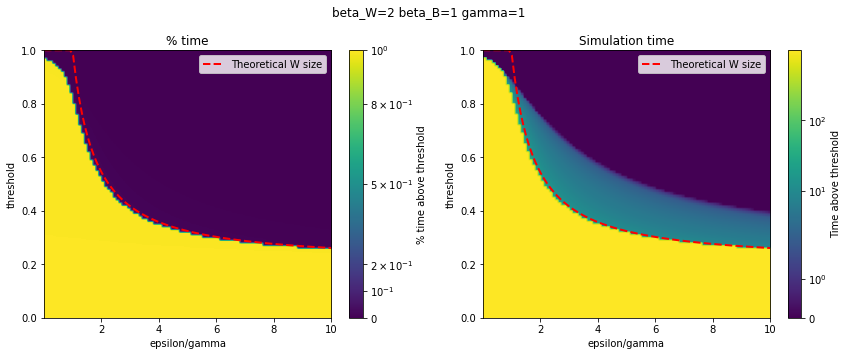

In [34]:
plot_2D_botnet_time(a, parameters['beta']['W'], parameters['beta']['B'], parameters['gamma'])

In [35]:
parameters = {
    'beta': {'B': 1, 'W': 2},
    'epsilon': 1,
    'gamma': 0.5,
    'mu': 1
}
t, V, B, D, DB, W, WB, P = list(range(8))

force_rate_list = np.linspace(0.01, 10, 100)
threshold_list = np.linspace(0, 1.0, 100)

a = compute_botnet_threshold(parameters, 1000, force_rate_list, threshold_list)

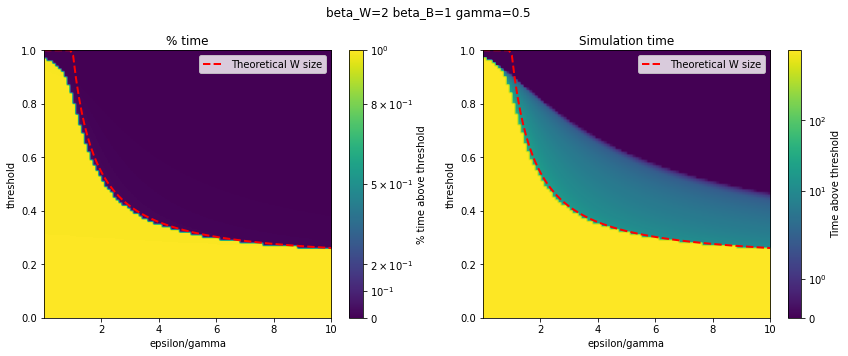

In [36]:
plot_2D_botnet_time(a, parameters['beta']['W'], parameters['beta']['B'], parameters['gamma'])

In [37]:
parameters = {
    'beta': {'B': 1, 'W': 2},
    'epsilon': 1,
    'gamma': 2,
    'mu': 1
}
t, V, B, D, DB, W, WB, P = list(range(8))

force_rate_list = np.linspace(0.01, 10, 100)
threshold_list = np.linspace(0, 1.0, 100)

a = compute_botnet_threshold(parameters, 1000, force_rate_list, threshold_list)

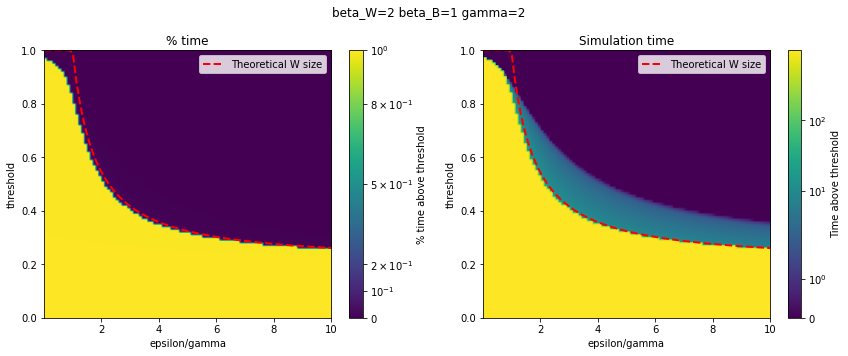

In [38]:
plot_2D_botnet_time(a, parameters['beta']['W'], parameters['beta']['B'], parameters['gamma'])

In [39]:
parameters = {
    'beta': {'B': 1, 'W': 3},
    'epsilon': 1,
    'gamma': 1,
    'mu': 1
}
t, V, B, D, DB, W, WB, P = list(range(8))

force_rate_list = np.linspace(0.01, 10, 100)
threshold_list = np.linspace(0, 1.0, 100)

a = compute_botnet_threshold(parameters, 1000, force_rate_list, threshold_list)

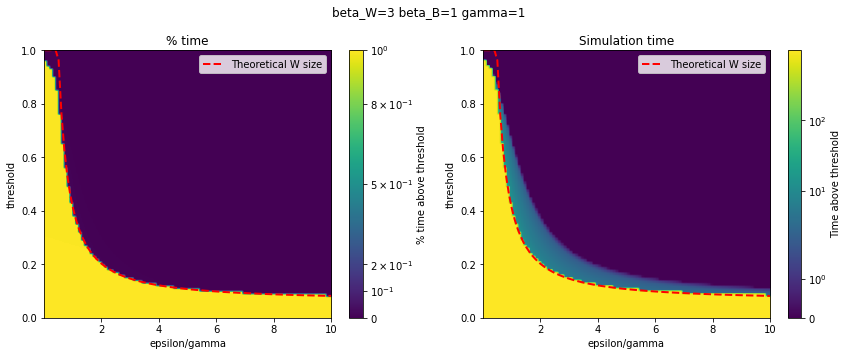

In [40]:
plot_2D_botnet_time(a, parameters['beta']['W'], parameters['beta']['B'], parameters['gamma'])

In [41]:
parameters = {
    'beta': {'B': 2, 'W': 6},
    'epsilon': 1,
    'gamma': 1,
    'mu': 1
}
t, V, B, D, DB, W, WB, P = list(range(8))

force_rate_list = np.linspace(0.01, 10, 100)
threshold_list = np.linspace(0, 1.0, 100)

a = compute_botnet_threshold(parameters, 1000, force_rate_list, threshold_list)

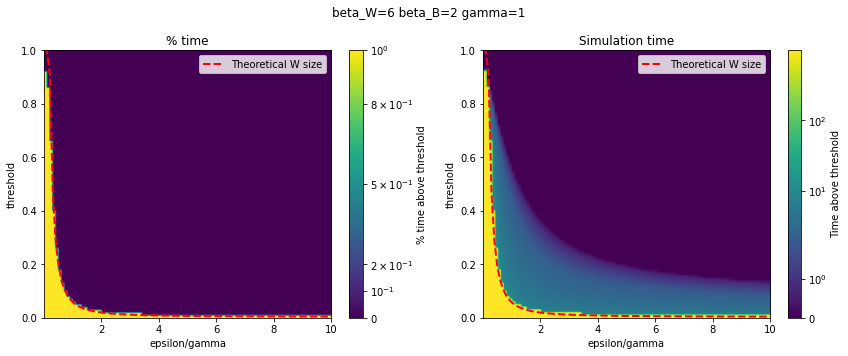

In [42]:
plot_2D_botnet_time(a, parameters['beta']['W'], parameters['beta']['B'], parameters['gamma'])

# Comparison with the complete graph

Now that we have a good understanding of the model, we can try to reproduce some of the results with the Gillespie algorithm on the complete graph to check if it's correct. In particular, we will focus on the final fraction of protected nodes as a function of $\beta_W$ and $\epsilon$, and the size of the botnet as a function of $\beta_B$ and $\beta_W$.

In [5]:
import pathlib
import pickle

results = np.empty((0, 3))
for file_path in pathlib.Path('results').glob('protected_ER_N10000_*'):

    bW = float(file_path.stem.split('_bW')[1].split('_')[0])
    e = float(file_path.stem.split('_e')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    protected = [x for x in data_list if x > 0.01]
    protected = np.median(protected) if len(protected) else 0

    results = np.vstack((results,
                         np.array([bW, e, protected])))

results = results[results[:, 1].argsort()]
results = results[results[:, 0].argsort(kind='mergesort')]

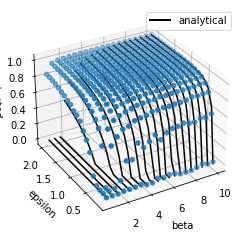

In [6]:
plot_3D_protected(results)

In [45]:
import pathlib
import pickle

results = np.empty((0, 3))
for file_path in pathlib.Path('results').glob('botnet_CG_N1000_*'):

    bB = float(file_path.stem.split('_bB')[1].split('_')[0])
    bW = float(file_path.stem.split('_bW')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    botnet = [botnet for botnet, protected in data_list if protected > 0.01]
    botnet = np.mean(botnet) if len(botnet) else 1

    results = np.vstack((results,
                         np.array([bB, bW, botnet])))

results = results[results[:, 1].argsort()]
results = results[results[:, 0].argsort(kind='mergesort')]

ValueError: zero-size array to reduction operation minimum which has no identity

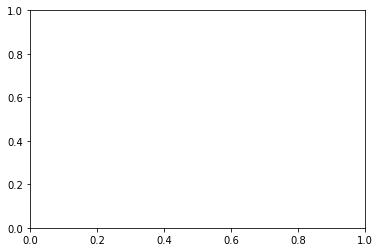

In [46]:
plot_2D_botnet(results)

In [ ]:
#import pathlib
#import pickle

#results = np.empty((0, 3))
#for file_path in pathlib.Path('results').glob('botnet_threshold_CG_N1000_*'):

#    bB = float(file_path.stem.split('_bB')[1].split('_')[0])
#    bW = float(file_path.stem.split('_bW')[1].split('_')[0])

#    with open(file_path, 'rb') as file:
#        data_list = pickle.load(file)

#    botnet = [botnet for botnet, protected in data_list if protected > 0.01]
#    botnet = np.mean(botnet) if len(botnet) else 1

#    results = np.vstack((results,
#                         np.array([bB, bW, botnet])))

#results = results[results[:, 1].argsort()]
#results = results[results[:, 0].argsort(kind='mergesort')]